In [1]:
import matplotlib.pyplot as plt
import numpy as np
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))#adding thetai *xi
    h = h.reshape(X.shape[0])
    return h

In [2]:
def batch_gradient_descent(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters, dtype=np.float64)#initializing cost
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])#calculating and changing by error margin
        h = hypothesis(theta, X, n)#recalculating hypothesis after iteration
        cost[i] = (1.0/X.shape[0]) * 0.5 * float(sum(np.square(h - y)))#recalculating cost
    theta = theta.reshape(1,n+1)
    return theta, cost

In [3]:
def linear_regression(X, y, alpha, num_iters):
    #n = X.shape[1]
    one_column = np.ones((X.shape[0],1)) #appending ones column for theta0
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    h = hypothesis(theta, X, n)#calculating hypothesis
    # returning the optimized parameters by Gradient Descent...
    theta, cost = batch_gradient_descent(theta,alpha,num_iters,h,X,y,n)#performing batch gradient descent
    return theta, cost

In [4]:
import random
filename = input("Enter file name: ")
#Entering comma separated file
data = np.loadtxt(filename, delimiter=',')

random.shuffle(data)

l=len(data) #nos of rows
col=data.shape[1]
X_train = data[:int((l+1)*.80),:col-1] #feature set
y_train = data[:int((l+1)*.80),col-1] #label set
mean = np.ones(X_train.shape[1])#mean to normalize
std = np.ones(X_train.shape[1])#standard deviation
for i in range(0, X_train.shape[1]):
    mean[i] = np.mean(X_train.transpose()[i])
    std[i] = np.std(X_train.transpose()[i])
    for j in range(0, X_train.shape[0]):
        X_train[j][i] = (X_train[j][i] - mean[i])/std[i]

x_test = data[int(l*.80+1):,:col-1]#normalize feature set
y_test = data[int(l*.80+1):,col-1]#normalize label set
n = X_train.shape[1]

Enter file name: data2.txt


In [5]:
def ContourPlot(theta,X,y):
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    
    x_data = theta[0,1]
    y_data = theta[0,2]
    
    xModel = np.linspace(-1000, 1000, num=100)#setting -x and +x limits of model
    yModel = np.linspace(-1000, 1000, num=100)#setting -y and +y limits of model
    Th1, Th2 = np.meshgrid(xModel, yModel)
    fig = plt.figure(figsize=(6,5))
    left, bottom, width, height = 0.1, 0.1, 0.8, 0.8 #setting lower left bottom width and height
    ax = fig.add_axes([left, bottom, width, height]) 

    thetaDup = theta.copy()
    Z = np.zeros((len(xModel), len(yModel)))
    #print(X)
    for i in range(0,len(xModel)):
        thetaDup[0,1] = xModel[i]
        for j in range(0, len(yModel)):
            thetaDup[0,2] = yModel[j]
            h = hypothesis(thetaDup, X, n)#calculating hypothesis
            Z[i][j] =( (1.0/X.shape[0]) * 0.5 * float(sum(np.square(h - y)))) #calculating depth from hypothesis
    
    cp = plt.contour(Th1, Th2, Z)
    ax.clabel(cp, inline=True, fontsize=10)
    ax.set_title('Contour Plot')
    ax.set_xlabel('Theta 1')
    ax.set_ylabel('Theta 2')
    plt.show()

def calculate_regression(alpha, l, xt, yt):
    
    theta, cost = linear_regression(X_train, y_train,alpha, 30000)
    cost = list(cost)
    #print (theta)
    #print (cost)
    
    one_column1 = np.ones((xt.shape[0],1))
    xt = np.concatenate((one_column1, xt), axis = 1)
    h=hypothesis(theta, xt, n)#calculating hypothesis
    print ("Average error: "+str((h - yt).mean()))
    print ("RMS error: "+str(np.sqrt(((h - yt) ** 2).mean())))
    
    n_iterations = [x for x in range(1,30001)]
    #plotting cost versus iterations
    plt.plot(n_iterations, cost)
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost')
    #plotting contouring
    ContourPlot(theta,X_train,y_train)
    


Average error: 167867011.61994016
RMS error: 171686657.89178783


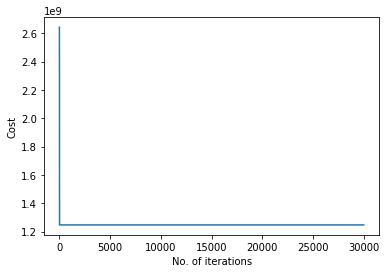

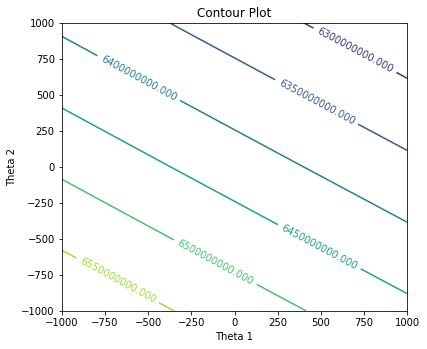

Average error: 167867011.61993995
RMS error: 171686657.89178762


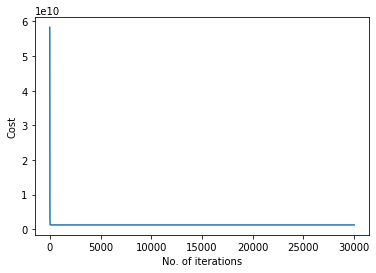

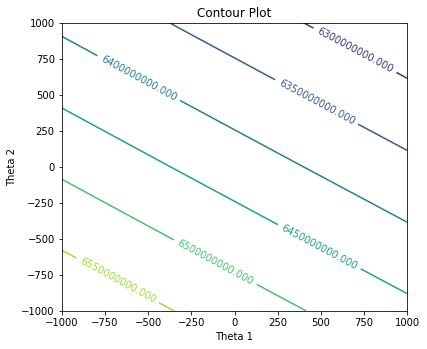

Average error: 167867011.61993814
RMS error: 171686657.89178574


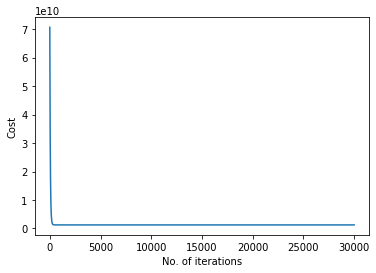

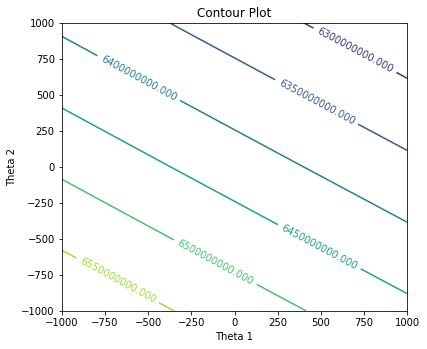

Average error: 167866974.9313954
RMS error: 171686620.36313084


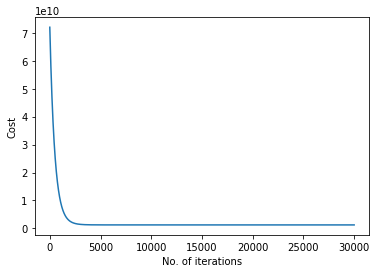

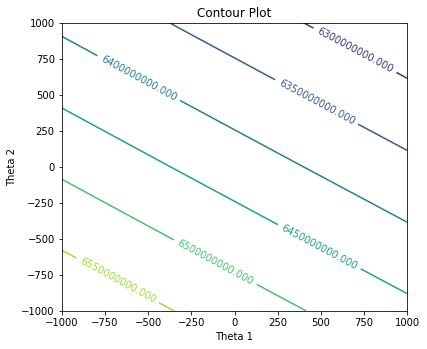

Average error: 150773906.46977732
RMS error: 154203116.96836796


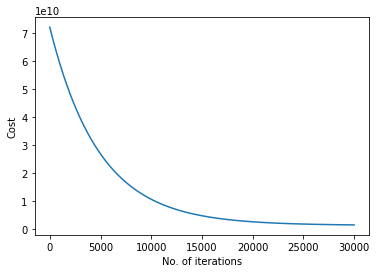

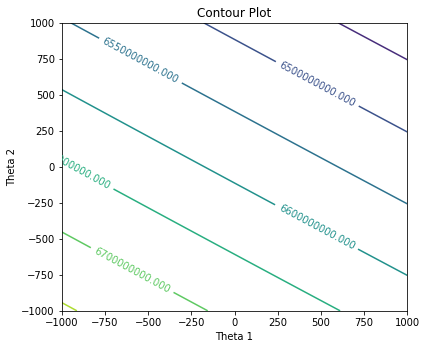

In [6]:

alpha = 1.0
for a in range(5):
    calculate_regression(alpha, l, x_test, y_test)
    alpha/=10 #decrementing the learning rate by 1/10th



In [7]:
def batch_gradient_descent2(theta, alpha, num_iters, h, X, y, n, lam_bda):
    cost = np.ones(num_iters, dtype=np.float64)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        theta1 = 0.0
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
            theta1 += abs(theta[j])
        h = hypothesis(theta, X, n)#recalculating hypothesis
        
        cost[i] = (1.0/X.shape[0]) * 0.5 * float(sum(np.square(h - y))) + (float(lam_bda) * theta1)#recalculating cost with modified lambda
    theta = theta.reshape(1,n+1)
    return theta,cost
def linear_regression2(X, y, alpha, num_iters, lam_bda):
    #following the same procedure
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)#adding extra column of 1s
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = batch_gradient_descent2(theta,alpha,num_iters,h,X,y,n,lam_bda)
    return theta, cost

In [8]:
import matplotlib.pyplot as plt
def calculating_part2(lam_bda):
    theta, cost = linear_regression2(X_train, y_train,0.0001, 30000,lam_bda)
    cost = list(cost)
    n_iterations = [x for x in range(1,30001)]
    #plotting iterating versus cost for different lambda
    plt.plot(n_iterations, cost)
    plt.title('Variation of Cost with Alpha after Regularization')
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost')

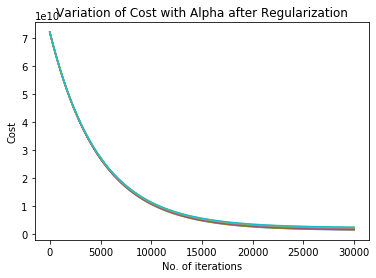

In [9]:
#to calculate for regularization
#l is lambda 
for l in range(0, 10000, 1000):
    calculating_part2(l)